In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [14]:
train_path = '/Users/princely lopes/Downloads/bull-vs-nobull/train'
valid_path = '/Users/princely lopes/Downloads/bull-vs-nobull/valid'
test_path = '/Users/princely lopes/Downloads/bull-vs-nobull/test'

In [15]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['fruit', 'holi','killing','normal','poster','scary'], batch_size=8)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['fruit', 'holi','killing','normal','poster','scary'], batch_size=8)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['fruit', 'holi','killing','normal','poster','scary'], batch_size=8, shuffle=False)

Found 1509 images belonging to 6 classes.
Found 419 images belonging to 6 classes.
Found 213 images belonging to 6 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


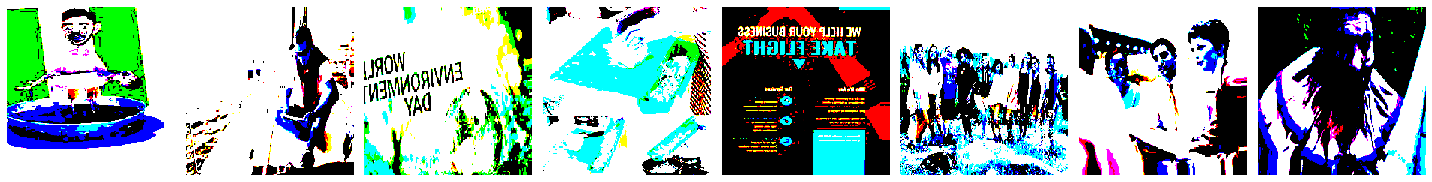

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [16]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 8, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [17]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [18]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [20]:
for layer in model.layers[:-1]:
    layer.trainable = False   
# layer.trainable = True

In [21]:
model.add(Dense(units=6, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [23]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
189/189 - 346s - loss: 0.2152 - accuracy: 0.9463 - val_loss: 0.4558 - val_accuracy: 0.9332
Epoch 2/5
189/189 - 350s - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.5681 - val_accuracy: 0.9189
Epoch 3/5
189/189 - 360s - loss: 9.2331e-05 - accuracy: 1.0000 - val_loss: 0.5168 - val_accuracy: 0.9212
Epoch 4/5
189/189 - 374s - loss: 8.8274e-06 - accuracy: 1.0000 - val_loss: 0.5200 - val_accuracy: 0.9236
Epoch 5/5
189/189 - 364s - loss: 6.3966e-06 - accuracy: 1.0000 - val_loss: 0.5223 - val_accuracy: 0.9236


In [25]:
predictions=model.predict(x=test_batches,verbose=1)

27/27 [==============================] - 40s 1s/step


In [26]:
predictions

array([[9.99999881e-01, 1.91181619e-12, 5.72022681e-12, 1.01858809e-07,
        2.90877305e-12, 1.51804924e-09],
       [9.99999881e-01, 7.70828646e-14, 9.12291727e-13, 8.99495929e-12,
        6.67383304e-09, 1.21838724e-07],
       [1.00000000e+00, 1.37691795e-14, 6.29233714e-15, 4.13351238e-13,
        2.44709697e-09, 8.94003094e-10],
       ...,
       [1.41092231e-27, 6.06650839e-24, 1.14784849e-31, 2.42510279e-26,
        1.01433695e-25, 1.00000000e+00],
       [5.62243177e-13, 5.45144418e-09, 1.36125920e-13, 1.67234502e-05,
        4.02701344e-11, 9.99983311e-01],
       [4.04158098e-17, 1.94423091e-13, 1.16620359e-18, 4.42772798e-11,
        3.25714471e-15, 1.00000000e+00]], dtype=float32)

In [27]:
np.round(predictions)

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 8  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  2 34  1  2 11]
 [ 0  0 14 35  0  1]
 [ 0  0  1  0 49  0]
 [ 0  0  0  0  0 50]]


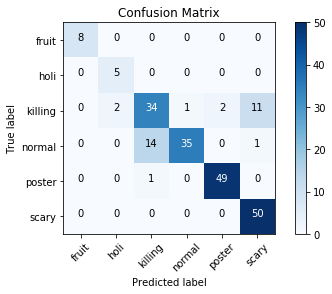

In [29]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['fruit', 'holi','killing','normal','poster','scary']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [30]:
ac = accuracy_score(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
ac

0.8497652582159625

In [31]:
import tensorflow as tf
from tensorflow import keras
# from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'


In [32]:
my_model = keras.models.load_model('my_model.h5')